In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split    
from sklearn.metrics import accuracy_score 

In [3]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# [Problem 1] Selection of features for practice
After reading the dataset, extract the explanatory variables GrLivArea and YearBuilt, and the objective variable SalePrice, respectively.


In [7]:
features = ['GrLivArea', 'YearBuilt']
target = ['SalePrice']

X = data[features].values
y = data[target].values

# [Problem 2] Estimation and evaluation by linear regression

In [9]:
# z Standardization
X_std = scale(X)
y_std = scale(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, random_state = 0)

In [16]:
print("Train: ",X_train.shape)
print("Test: ",X_test.shape)

Train:  (1095, 2)
Test:  (365, 2)


Feature:  ['GrLivArea', 'YearBuilt']
Predict:  ['SalePrice']
Correct Rate: 43.22%


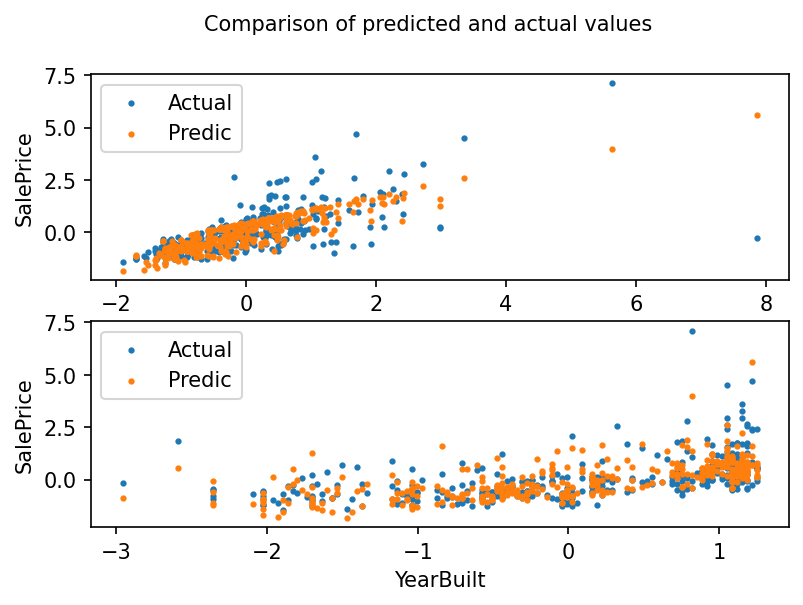

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
score_list = []
# Calculate Mean Square Root and Plot
def cal_and_plot_model(model, features, target):
    model.fit(X_train, y_train)

    pred_y = model.predict(X_test)

    score = mean_squared_error(y_test, pred_y)
    score_list.append(score)

    print("Feature: ", features)
    print("Predict: ", target)
    print("Correct Rate: {:.2f}%".format(score*100))

    fig = plt.figure(dpi=150)
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)
    fig.suptitle('Comparison of predicted and actual values', fontsize=10)

    ax1.set_xlabel(features[0])
    ax1.set_ylabel(target[0])
    ax1.scatter(X_test[:, 0], y_test, label='Actual', s=4)
    ax1.scatter(X_test[:, 0], pred_y, label='Predic', s=4)
    ax1.legend()
    ax1.plot()


    ax2.set_xlabel(features[1])
    ax2.set_ylabel(target[0])
    ax2.scatter(X_test[:, 1], y_test, label='Actual', s=4)
    ax2.scatter(X_test[:, 1], pred_y, label='Predic', s=4)
    ax2.legend()
    ax2.plot


    
lr = LinearRegression()

cal_and_plot_model(lr, features, target)

# [Problem 3] Comparison of methods

J:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
Feature:  ['GrLivArea', 'YearBuilt']
Predict:  ['SalePrice']
Correct Rate: 36.29%


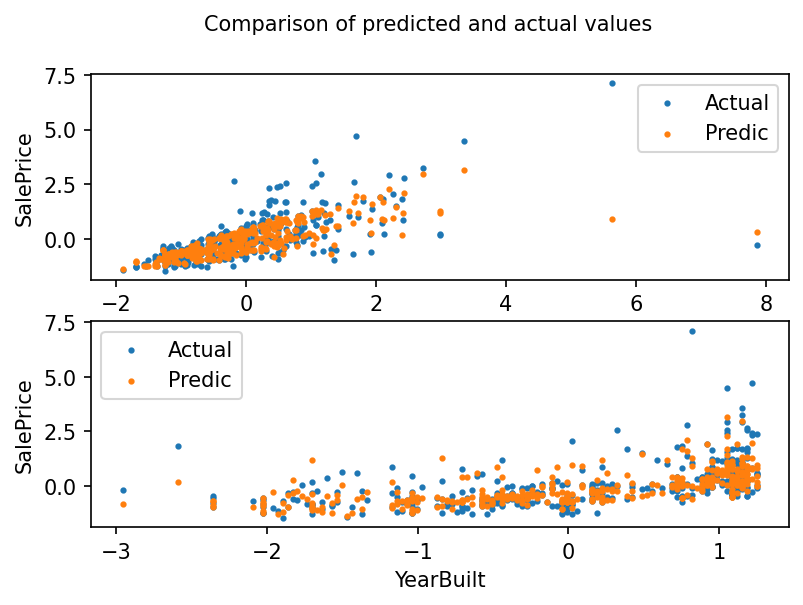

In [40]:
#SVM

from sklearn.svm import SVR

svr = SVR()

cal_and_plot_model(svr, features, target)

Feature:  ['GrLivArea', 'YearBuilt']
Predict:  ['SalePrice']
Correct Rate: 49.86%


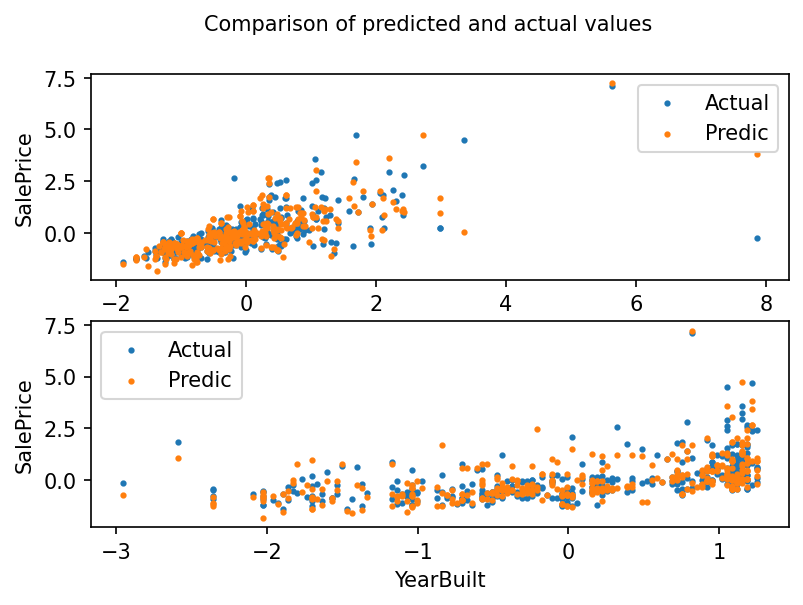

In [41]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
cal_and_plot_model(tree, features, target)

<ipython-input-39-4c52617258d8>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
Feature:  ['GrLivArea', 'YearBuilt']
Predict:  ['SalePrice']
Correct Rate: 29.79%


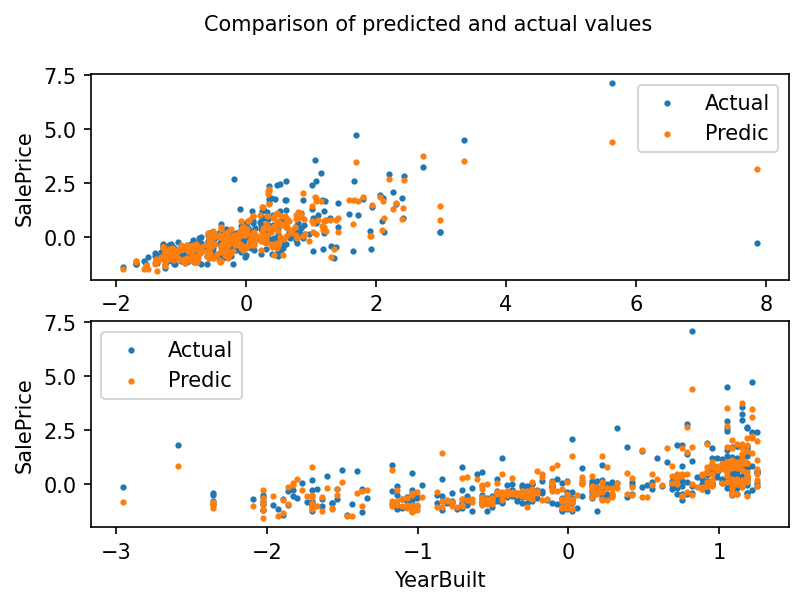

In [42]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
cal_and_plot_model(forest, features, target)

In [43]:
df_score = pd.DataFrame(score_list,
                        columns=['Correct Rate'],
                        index=['Linear Regression', 'SVM', 'Decision Tree', 'Random Forest'])
df_score

,Correct Rate
Linear Regression,0.432218
SVM,0.362905
Decision Tree,0.498610
Random Forest,0.297897


Conclusion: Decision Tree is likely to predict the most accurate

# [Problem 4] (Advance assignment) Learning using other features

In [53]:
features = ['GrLivArea', 'YearBuilt', 'LotArea', 'YearRemodAdd']
target = ['SalePrice']

X = data[features].values
y = data[target].values
X_std = scale(X)
y_std = scale(y)

X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, random_state = 0)

score_list = []

def cal_and_plot_model_multiple(model, features, target):
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)
    score = mean_squared_error(y_test, pred_y)
    score_list.append(score)

    print("Feature: ", features)
    print("Predict: ", target)
    print("Correct Rate: {:.2f}%".format(score*100))

    fig = plt.figure(dpi=150)

    fig.suptitle('Comparison of predicted and correct values', fontsize=10)

    for i in range(len(features)):
        ax = plt.subplot(len(features), 1, i+1)
        ax.set_xlabel(features[i])
        ax.set_ylabel(target[0])
        ax.scatter(X_test[:, i], y_test, label='Actual',s=3)
        ax.scatter(X_test[:, i], pred_y, label='Predic',s=3)


Feature:  ['GrLivArea', 'YearBuilt', 'LotArea', 'YearRemodAdd']
Predict:  ['SalePrice']
Correct Rate: 42.11%


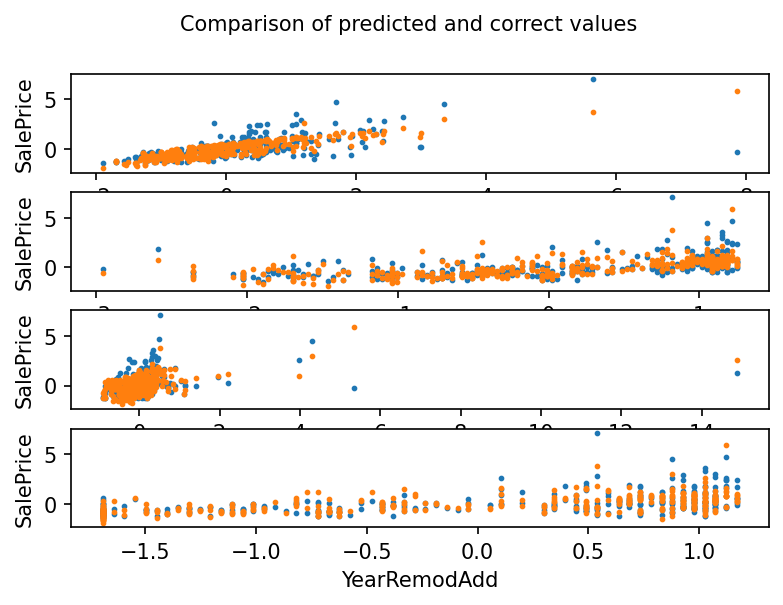

In [54]:
lr = LinearRegression()

cal_and_plot_model_multiple(lr, features, target)

J:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
Feature:  ['GrLivArea', 'YearBuilt', 'LotArea', 'YearRemodAdd']
Predict:  ['SalePrice']
Correct Rate: 31.36%


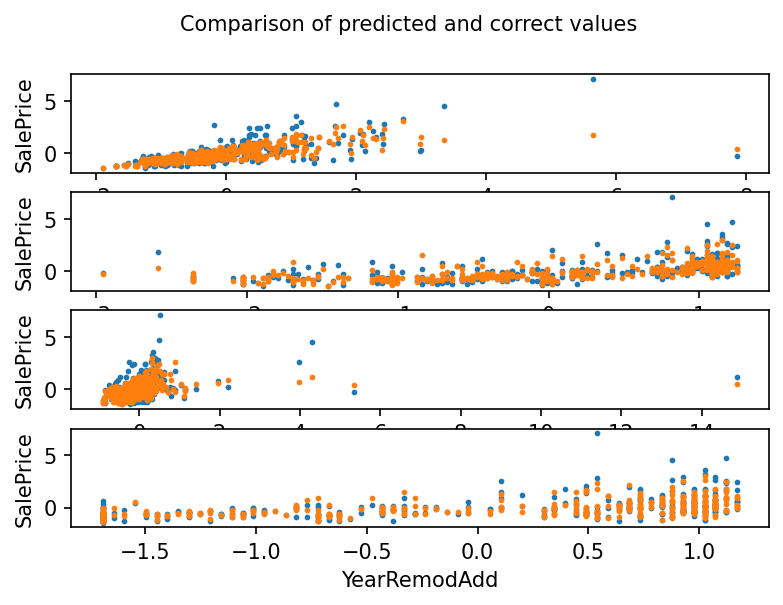

In [55]:
svr = SVR()

cal_and_plot_model_multiple(svr, features, target)

Feature:  ['GrLivArea', 'YearBuilt', 'LotArea', 'YearRemodAdd']
Predict:  ['SalePrice']
Correct Rate: 34.34%


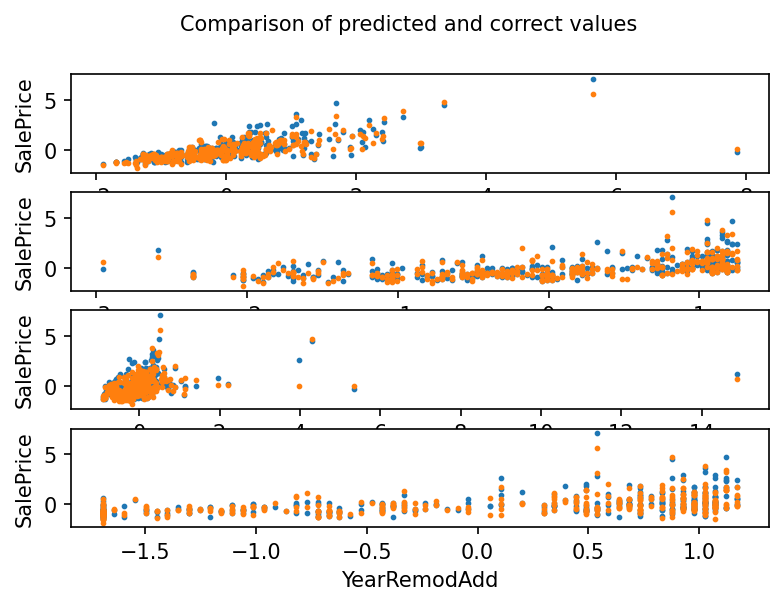

In [57]:
tree = DecisionTreeRegressor()

cal_and_plot_model_multiple(tree, features, target)

<ipython-input-53-4eeb1a5b55e7>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
Feature:  ['GrLivArea', 'YearBuilt', 'LotArea', 'YearRemodAdd']
Predict:  ['SalePrice']
Correct Rate: 24.27%


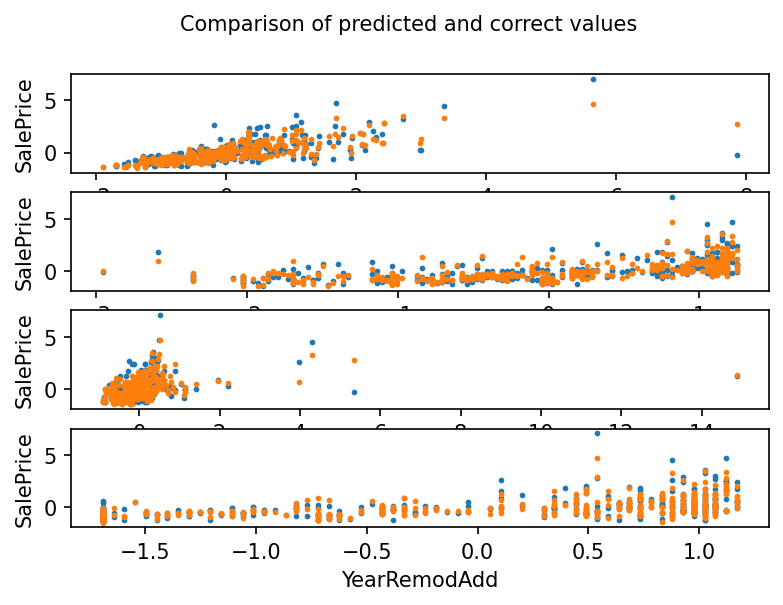

In [60]:
forest = RandomForestRegressor()

cal_and_plot_model_multiple(forest, features, target)

In [61]:
df_score = pd.DataFrame(score_list,
                        columns=['Correct Rate'],
                        index=['Linear Regression', 'SVM', 'Decision Tree', 'Random Forest'])
df_score

,Correct Rate
Linear Regression,0.421066
SVM,0.313565
Decision Tree,0.343447
Random Forest,0.242670


Conclusion: Add more features. The Correct Rate decreases. If the default settings are used when creating the model, the accuracy may decrease as the number of explanatory variables increases.